# 98. Boyut Azaltma

* Aynı veriyi daha az özellik(feature) ile temsil etme.
* Makine Öğrenmesinde pipeline kullanımı için son derece önemli
* Temel bileşen analizi ile boyut azaltma

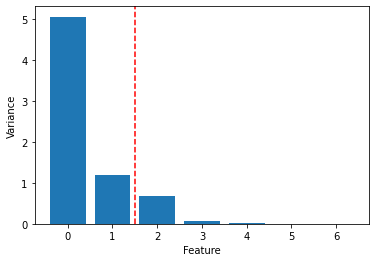

In [3]:
import numpy as np
data = np.loadtxt('seeds_dataset.txt')
data2 = data[:,0:7]
lenght = data[:,3]
width = data[:,4]
geometry = data[:,3:5]

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(data2)
features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_)
plt.xlabel('Feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.axvline(x = 1.5, ls = '--', c = 'r')
plt.show()

* Kırmızı çizginin solundaki veriler, daha baskın verilerdir : informative veri
* Sağındaki veriler, daha az etkiye sahip veriler : noisy

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(data2) # fit bu verileri de-kolere eder.
transformed = pca.transform(data2) # Veri seti sahip farklı şekilde ifade ediyoruz
print(transformed.shape)

(210, 2)


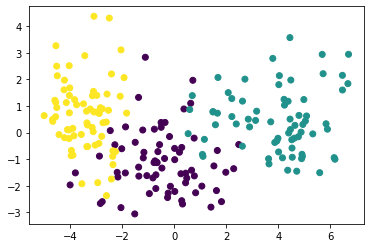

In [11]:
location = data[:,-1] # -1, Veri setinin son veri sütununu ifade eder.

import matplotlib.pyplot as plt
x = transformed[:,0] # x'e transformed yapılan verinin ilk sütununu atıyoruz.
y = transformed[:,1] # y'ye ise tranformed yapılan verinin ikinci ""  "".
plt.scatter(x, y, c = location) # c değeri locationa gidicek ve ne kadar 
                            #farklı veri varsa onları farklı renkte boyayacak 
plt.show()

## Kelime Sıklık Dizileri (Word Frequency Arrays)
### PCA her yerde çalışmadığı için bunu kullanabiliriz.
### Veri seti string verilerden oluşuyorsa kullanılabilir.

- Bazı durumlarda PCA'in yerine alternatif yöntem uygulanması gerekebilir.
- Kelime sıklık dizileri kelimelerin belirlenen cümlelerde/dosyalarda kaç kere(sıklık) kullanıldığını gösterir.

cümle = ["benim adım ali ", "benim adım ayşe", "hayır hayır yapmadım "]

- Kelime sıklık dizisi
- sparce kavramı
    * kelime sıklıkları (word frequencies) ("tf-idf") ile ifade edilir.
    * scipy.sparse.csr_matrix(csr_matrix)
        + Sadece sıfır olmayan(non-zero) değerleri hafızayı alır.
        + scikit-learn PCA terine TruncatedSVD kullanılır.
        + Aşamalar birbirleri ile aynıdır.
        

In [25]:
# Wikipedia uygulaması
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

svd = TruncatedSVD(n_components = 50)
kmeans = KMeans(n_clusters = 6)
pipeline = make_pipeline(svd, kmeans)

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix
import pandas as pd

data = pd.read_csv('wikipedia-vectors.csv', index_col = 0)
articles = csr_matrix(data.transpose())
titles = list(data.columns)

pipeline.fit(articles)
labels = pipeline.predict(articles)
data_new = pd.DataFrame({'label': labels, 'article':titles})
print(data_new.sort_values('label'))

    label                                        article
29      0                               Jennifer Aniston
22      0                              Denzel Washington
23      0                           Catherine Zeta-Jones
24      0                                   Jessica Biel
25      0                                  Russell Crowe
26      0                                     Mila Kunis
27      0                                 Dakota Fanning
28      0                                  Anne Hathaway
21      0                             Michael Fassbender
20      0                                 Angelina Jolie
51      1                                     Nate Ruess
52      1                                     The Wanted
53      1                                   Stevie Nicks
54      1                                 Arctic Monkeys
55      1                                  Black Sabbath
56      1                                       Skrillex
57      1                      